<a href="https://colab.research.google.com/github/Aravindh-sreeni/assignment-case-study/blob/main/preprocessing_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,OrdinalEncoder

#**DATASET OVERVIEW**

In [2]:
df = pd.read_csv("/content/House_Pricing.csv")

In [3]:
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [5]:
df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#**DUPLICATE REMOVAL**

In [6]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
21608,False
21609,False
21610,False
21611,False


In [7]:
df.drop_duplicates(inplace=True)
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [8]:
df.T[df.T.duplicated()].index

Index([], dtype='object')

In [9]:
df.loc[:,~df.T.duplicated()]

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [10]:

df.shape

(21613, 21)

#**HANDILING MISSING VALUES**

In [11]:
df.isnull().sum()

,0
ID,0
Date House was Sold,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
No of Times Visited,19489


In [12]:
median_value = df['Sale Price'].median()
df['Sale Price'].fillna(median_value, inplace=True)



/tmp/ipython-input-1660823975.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sale Price'].fillna(median_value, inplace=True)


In [13]:
median_value = df['No of Bathrooms'].median()
df['No of Bathrooms'].fillna(median_value, inplace=True)

/tmp/ipython-input-2767823304.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['No of Bathrooms'].fillna(median_value, inplace=True)


In [14]:
mode_value = df['No of Times Visited'].mode()[0]
df['No of Times Visited'] = df['No of Times Visited'].fillna(mode_value)

In [15]:
median_value = df['Area of the House from Basement (in Sqft)'].median()
df['Area of the House from Basement (in Sqft)'].fillna(median_value, inplace=True)

/tmp/ipython-input-325423638.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Area of the House from Basement (in Sqft)'].fillna(median_value, inplace=True)


In [16]:
median_value = df['Zipcode'].median()
df['Zipcode'].fillna(median_value, inplace=True)

/tmp/ipython-input-1668110561.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Zipcode'].fillna(median_value, inplace=True)


In [17]:
median_value = df['Latitude'].median()
df['Latitude'].fillna(median_value, inplace=True)

/tmp/ipython-input-2441693153.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(median_value, inplace=True)


In [18]:
median_value = df['Longitude'].median()
df['Longitude'].fillna(median_value, inplace=True)

/tmp/ipython-input-3024764980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Longitude'].fillna(median_value, inplace=True)


In [19]:
median_value = df['Living Area after Renovation (in Sqft)'].median()
df['Living Area after Renovation (in Sqft)'].fillna(median_value, inplace=True)

/tmp/ipython-input-4183297630.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Living Area after Renovation (in Sqft)'].fillna(median_value, inplace=True)


In [20]:
df


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Twice,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Twice,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Twice,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Twice,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Twice,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,Twice,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,Twice,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,Twice,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,Twice,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


#**OUTLIER DETECTION**

In [21]:
import seaborn as sns


<Axes: ylabel='Sale Price'>

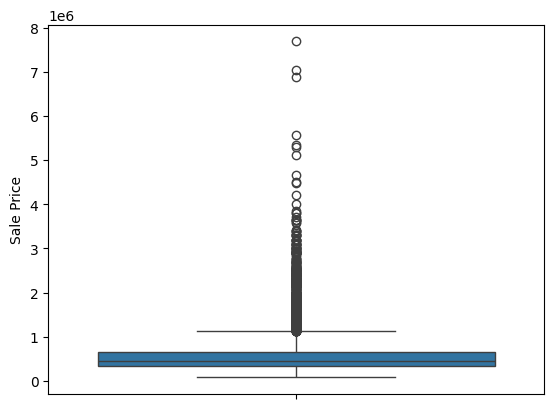

In [22]:
sns.boxplot(y=df['Sale Price'])

In [23]:
Q1 = df['Sale Price'].quantile(0.25)
Q3 = df['Sale Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(Q1,Q3,IQR,lower_bound,upper_bound)

322000.0 645000.0 323000.0 -162500.0 1129500.0


In [24]:
df.shape

(21613, 21)

<Axes: ylabel='No of Bathrooms'>

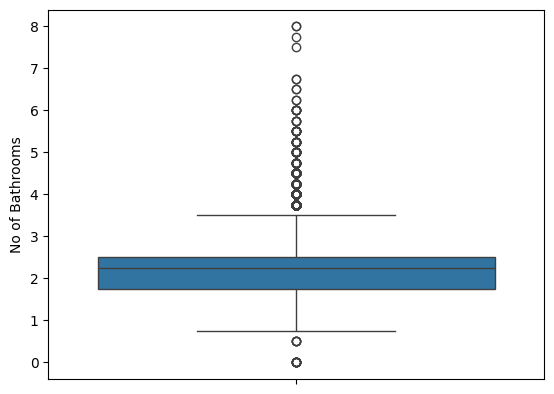

In [25]:
sns.boxplot(y=df['No of Bathrooms'])

In [26]:
Q1 = df['No of Bathrooms'].quantile(0.25)
Q3 = df['No of Bathrooms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(Q1,Q3,IQR,lower_bound,upper_bound)

1.75 2.5 0.75 0.625 3.625


In [27]:
df['No of Bathrooms']= df['No of Bathrooms'].clip(lower_bound,upper_bound)

<Axes: ylabel='No of Bedrooms'>

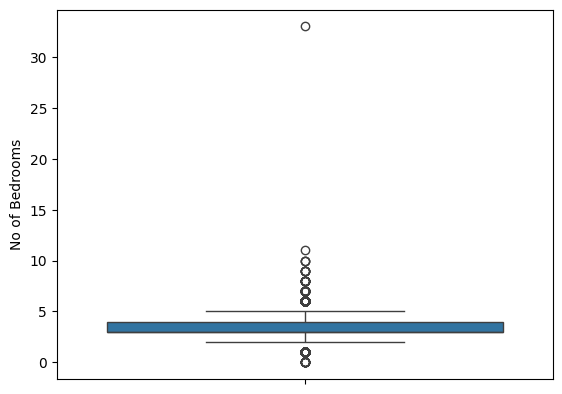

In [28]:
sns.boxplot(y=df['No of Bedrooms'])

In [29]:
Q1 = df['No of Bedrooms'].quantile(0.25)
Q3 = df['No of Bedrooms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(Q1,Q3,IQR,lower_bound,upper_bound)

3.0 4.0 1.0 1.5 5.5


In [30]:
df['No of Bedrooms']= df['No of Bedrooms'].clip(lower_bound,upper_bound)

<Axes: ylabel='Flat Area (in Sqft)'>

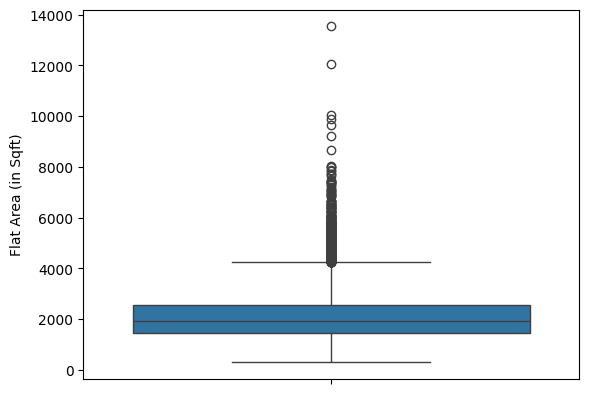

In [31]:
sns.boxplot(y=df['Flat Area (in Sqft)'])

In [32]:
Q1 = df['Flat Area (in Sqft)'].quantile(0.25)
Q3 = df['Flat Area (in Sqft)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(Q1,Q3,IQR,lower_bound,upper_bound)

1429.25 2550.0 1120.75 -251.875 4231.125


In [33]:
df['Flat Area (in Sqft)']= df['Flat Area (in Sqft)'].clip(lower_bound,upper_bound)

<Axes: ylabel='Overall Grade'>

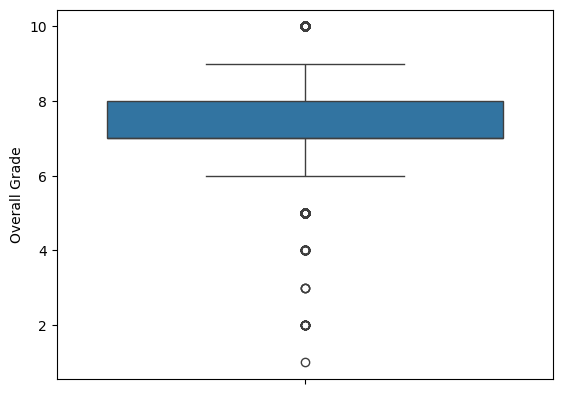

In [34]:
sns.boxplot(y=df['Overall Grade'])

In [35]:
Q1 = df['Overall Grade'].quantile(0.25)
Q3 = df['Overall Grade'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(Q1,Q3,IQR,lower_bound,upper_bound)

7.0 8.0 1.0 5.5 9.5


In [36]:

df['Overall Grade']= df['Overall Grade'].clip(lower_bound,upper_bound)

<Axes: ylabel='Area of the House from Basement (in Sqft)'>

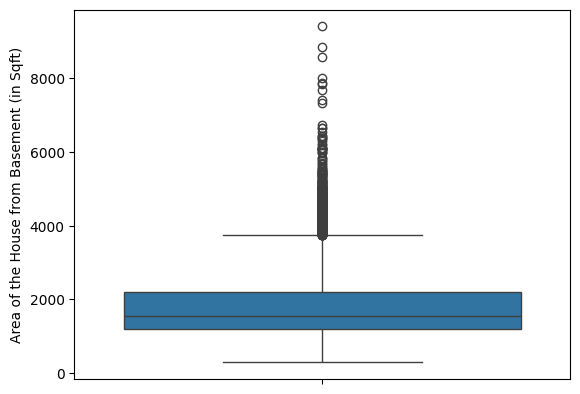

In [37]:
sns.boxplot(y=df['Area of the House from Basement (in Sqft)'])

In [38]:
Q1 = df['Area of the House from Basement (in Sqft)'].quantile(0.25)
Q3 = df['Area of the House from Basement (in Sqft)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(Q1,Q3,IQR,lower_bound,upper_bound)

1190.0 2210.0 1020.0 -340.0 3740.0


In [39]:
df['Area of the House from Basement (in Sqft)']= df['Area of the House from Basement (in Sqft)'].clip(lower_bound,upper_bound)

<Axes: ylabel='Basement Area (in Sqft)'>

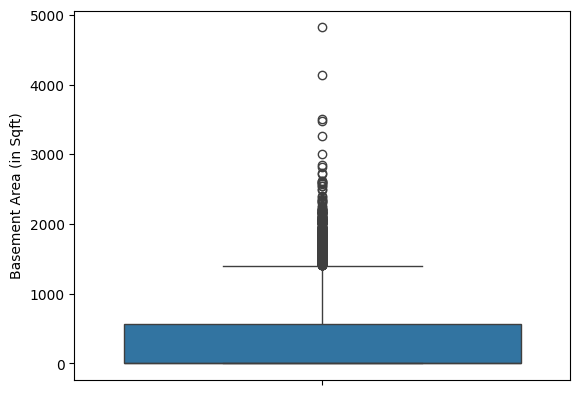

In [40]:
sns.boxplot(y=df['Basement Area (in Sqft)'])

In [41]:
Q1 = df['Basement Area (in Sqft)'].quantile(0.25)
Q3 = df['Basement Area (in Sqft)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(Q1,Q3,IQR,lower_bound,upper_bound)

0.0 560.0 560.0 -840.0 1400.0


In [42]:
df['Basement Area (in Sqft)']= df['Basement Area (in Sqft)'].clip(lower_bound,upper_bound)

<Axes: ylabel='Longitude'>

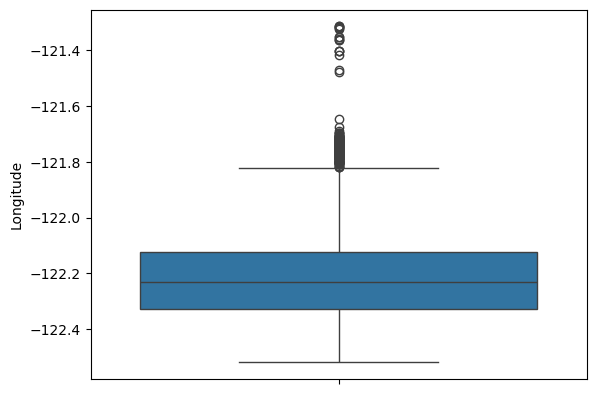

In [43]:
sns.boxplot(y=df['Longitude'])

In [44]:
Q1 = df['Longitude'].quantile(0.25)
Q3 = df['Longitude'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(Q1,Q3,IQR,lower_bound,upper_bound)

-122.328 -122.125 0.20300000000000296 -122.63250000000001 -121.8205


In [45]:
df['Longitude']= df['Longitude'].clip(lower_bound,upper_bound)

<Axes: ylabel='Living Area after Renovation (in Sqft)'>

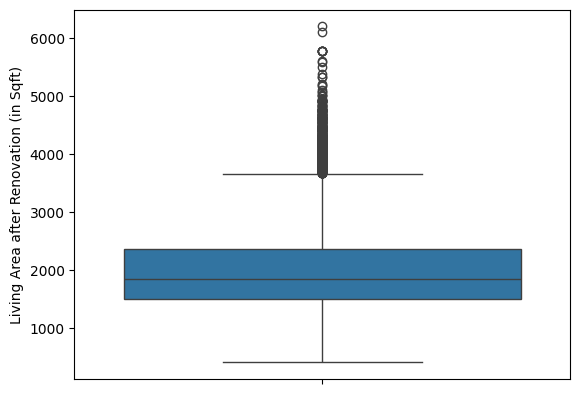

In [46]:
sns.boxplot(y=df['Living Area after Renovation (in Sqft)'])

In [47]:
Q1 = df['Living Area after Renovation (in Sqft)'].quantile(0.25)
Q3 = df['Living Area after Renovation (in Sqft)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(Q1,Q3,IQR,lower_bound,upper_bound)

1490.0 2360.0 870.0 185.0 3665.0


In [48]:
df['Living Area after Renovation (in Sqft)']= df['Living Area after Renovation (in Sqft)'].clip(lower_bound,upper_bound)

#**Encoding Categorical Variables**

In [49]:
sorted(df['No of Times Visited'].dropna().unique())

['Four', 'Once', 'Thrice', 'Twice']

In [50]:
df = pd.get_dummies(df, columns = ['No of Times Visited'],dtype=int,prefix=['notv'])
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),notv_Four,notv_Once,notv_Thrice,notv_Twice
0,7129300520,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,Fair,...,0,98178.0,47.5112,-122.257,1340.0,5650,0,0,0,1
1,6414100192,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,Fair,...,1991,98125.0,47.7210,-122.319,1690.0,7639,0,0,0,1
2,5631500400,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,No,Fair,...,0,98028.0,47.7379,-122.233,2720.0,8062,0,0,0,1
3,2487200875,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,Excellent,...,0,98136.0,47.5208,-122.393,1360.0,5000,0,0,0,1
4,1954400510,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,Fair,...,0,98074.0,47.6168,-122.045,1800.0,7503,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3.0,2.50,1530.0,1131.0,3.0,No,Fair,...,0,98103.0,47.6993,-122.346,1530.0,1509,0,0,0,1
21609,6600060120,15 February 2016,400000.0,4.0,2.50,2310.0,5813.0,2.0,No,Fair,...,0,98146.0,47.5107,-122.362,1830.0,7200,0,0,0,1
21610,1523300141,14 June 2017,402101.0,2.0,0.75,1020.0,1350.0,2.0,No,Fair,...,0,98144.0,47.5944,-122.299,1020.0,2007,0,0,0,1
21611,291310100,15 January 2016,400000.0,3.0,2.50,1600.0,2388.0,2.0,No,Fair,...,0,98027.0,47.5345,-122.069,1410.0,1287,0,0,0,1


In [51]:
sorted(df['Condition of the House'].dropna().unique())

['Bad', 'Excellent', 'Fair', 'Good', 'Okay']

In [52]:
label_enc = LabelEncoder()
df['Condition of the House']= label_enc.fit_transform(df['Condition of the House'])
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),notv_Four,notv_Once,notv_Thrice,notv_Twice
0,7129300520,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,2,...,0,98178.0,47.5112,-122.257,1340.0,5650,0,0,0,1
1,6414100192,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,2,...,1991,98125.0,47.7210,-122.319,1690.0,7639,0,0,0,1
2,5631500400,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,No,2,...,0,98028.0,47.7379,-122.233,2720.0,8062,0,0,0,1
3,2487200875,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,1,...,0,98136.0,47.5208,-122.393,1360.0,5000,0,0,0,1
4,1954400510,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,2,...,0,98074.0,47.6168,-122.045,1800.0,7503,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3.0,2.50,1530.0,1131.0,3.0,No,2,...,0,98103.0,47.6993,-122.346,1530.0,1509,0,0,0,1
21609,6600060120,15 February 2016,400000.0,4.0,2.50,2310.0,5813.0,2.0,No,2,...,0,98146.0,47.5107,-122.362,1830.0,7200,0,0,0,1
21610,1523300141,14 June 2017,402101.0,2.0,0.75,1020.0,1350.0,2.0,No,2,...,0,98144.0,47.5944,-122.299,1020.0,2007,0,0,0,1
21611,291310100,15 January 2016,400000.0,3.0,2.50,1600.0,2388.0,2.0,No,2,...,0,98027.0,47.5345,-122.069,1410.0,1287,0,0,0,1


In [53]:
df['Waterfront View'] = df['Waterfront View'].str.lower().map({'yes': 1, 'no': 0})
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),notv_Four,notv_Once,notv_Thrice,notv_Twice
0,7129300520,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,2,...,0,98178.0,47.5112,-122.257,1340.0,5650,0,0,0,1
1,6414100192,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,2,...,1991,98125.0,47.7210,-122.319,1690.0,7639,0,0,0,1
2,5631500400,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,0,2,...,0,98028.0,47.7379,-122.233,2720.0,8062,0,0,0,1
3,2487200875,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,1,...,0,98136.0,47.5208,-122.393,1360.0,5000,0,0,0,1
4,1954400510,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,2,...,0,98074.0,47.6168,-122.045,1800.0,7503,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,2,...,0,98103.0,47.6993,-122.346,1530.0,1509,0,0,0,1
21609,6600060120,15 February 2016,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,2,...,0,98146.0,47.5107,-122.362,1830.0,7200,0,0,0,1
21610,1523300141,14 June 2017,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,2,...,0,98144.0,47.5944,-122.299,1020.0,2007,0,0,0,1
21611,291310100,15 January 2016,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,2,...,0,98027.0,47.5345,-122.069,1410.0,1287,0,0,0,1


#**SCAILING**

In [54]:
min_scale = MinMaxScaler()
num_cols = ['No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)',
   'Lot Area (in Sqft)','No of Floors','Overall Grade',
   'Area of the House from Basement (in Sqft)','Basement Area (in Sqft)',
   'Age of House (in Years)','Renovated Year','Zipcode','Latitude',
   'Longitude','Living Area after Renovation (in Sqft)',
   'Lot Area after Renovation (in Sqft)']
df[num_cols] = min_scale.fit_transform(df[num_cols])
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),notv_Four,notv_Once,notv_Thrice,notv_Twice
0,7129300520,14 October 2017,221900.0,0.375,0.125000,0.225824,0.003108,0.0,0,2,...,0.000000,0.893939,0.571498,0.375089,0.288120,0.005742,0,0,0,1
1,6414100192,14 December 2017,538000.0,0.375,0.541667,0.578515,0.004072,0.4,0,2,...,0.988089,0.626263,0.908959,0.286328,0.395285,0.008027,0,0,0,1
2,5631500400,15 February 2016,180000.0,0.125,0.125000,0.121793,0.005743,0.0,0,2,...,0.000000,0.136364,0.936143,0.409449,0.710655,0.008513,0,0,0,1
3,2487200875,14 December 2017,604000.0,0.625,0.791667,0.423737,0.002714,0.0,0,1,...,0.000000,0.681818,0.586939,0.180387,0.294244,0.004996,0,0,0,1
4,1954400510,15 February 2016,510000.0,0.375,0.458333,0.352691,0.004579,0.0,0,2,...,0.000000,0.368687,0.741354,0.678597,0.428965,0.007871,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,0.375,0.625000,0.314631,0.000370,0.8,0,2,...,0.000000,0.515152,0.874055,0.247674,0.346295,0.000986,0,0,0,1
21609,6600060120,15 February 2016,400000.0,0.625,0.625000,0.512544,0.003206,0.4,0,2,...,0.000000,0.732323,0.570693,0.224767,0.438151,0.007523,0,0,0,1
21610,1523300141,14 June 2017,402101.0,0.125,0.041667,0.185226,0.000503,0.4,0,2,...,0.000000,0.722222,0.705324,0.314961,0.190141,0.001558,0,0,0,1
21611,291310100,15 January 2016,400000.0,0.375,0.625000,0.332392,0.001132,0.4,0,2,...,0.000000,0.131313,0.608975,0.644238,0.309553,0.000731,0,0,0,1


In [55]:
df.drop('Date House was Sold',axis=1,inplace=True)


In [56]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Sale Price                                 21613 non-null  float64
 2   No of Bedrooms                             21613 non-null  float64
 3   No of Bathrooms                            21613 non-null  float64
 4   Flat Area (in Sqft)                        21604 non-null  float64
 5   Lot Area (in Sqft)                         21604 non-null  float64
 6   No of Floors                               21613 non-null  float64
 7   Waterfront View                            21613 non-null  int64  
 8   Condition of the House                     21613 non-null  int64  
 9   Overall Grade                              21613 non-null  float64
 10  Area of the House from

In [58]:
df.shape

(21613, 23)

In [59]:
df

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,...,Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),notv_Four,notv_Once,notv_Thrice,notv_Twice
0,7129300520,221900.0,0.375,0.125000,0.225824,0.003108,0.0,0,2,0.375,...,0.000000,0.893939,0.571498,0.375089,0.288120,0.005742,0,0,0,1
1,6414100192,538000.0,0.375,0.541667,0.578515,0.004072,0.4,0,2,0.375,...,0.988089,0.626263,0.908959,0.286328,0.395285,0.008027,0,0,0,1
2,5631500400,180000.0,0.125,0.125000,0.121793,0.005743,0.0,0,2,0.125,...,0.000000,0.136364,0.936143,0.409449,0.710655,0.008513,0,0,0,1
3,2487200875,604000.0,0.625,0.791667,0.423737,0.002714,0.0,0,1,0.375,...,0.000000,0.681818,0.586939,0.180387,0.294244,0.004996,0,0,0,1
4,1954400510,510000.0,0.375,0.458333,0.352691,0.004579,0.0,0,2,0.625,...,0.000000,0.368687,0.741354,0.678597,0.428965,0.007871,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,0.375,0.625000,0.314631,0.000370,0.8,0,2,0.625,...,0.000000,0.515152,0.874055,0.247674,0.346295,0.000986,0,0,0,1
21609,6600060120,400000.0,0.625,0.625000,0.512544,0.003206,0.4,0,2,0.625,...,0.000000,0.732323,0.570693,0.224767,0.438151,0.007523,0,0,0,1
21610,1523300141,402101.0,0.125,0.041667,0.185226,0.000503,0.4,0,2,0.375,...,0.000000,0.722222,0.705324,0.314961,0.190141,0.001558,0,0,0,1
21611,291310100,400000.0,0.375,0.625000,0.332392,0.001132,0.4,0,2,0.625,...,0.000000,0.131313,0.608975,0.644238,0.309553,0.000731,0,0,0,1


#**TESTTRAIN**

In [60]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Sale Price'])
y=df['Sale Price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print("shape of X_train:",x_train.shape)
print("shape of X_test:",x_test.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)

shape of X_train: (17290, 22)
shape of X_test: (4323, 22)
shape of y_train: (17290,)
shape of y_test: (4323,)
